In [98]:
import matplotlib.pyplot as plt 
import numpy as np
import math

def integrand(x):    # For (4)
    return math.sin(math.sqrt(100*x))**2

def gl_integrand(x): # For Gauss-Legendre
    return 0.5*integrand(0.5+0.5*x)

(1a) If $b$ is much larger than $a$ and $c$, then digits in $4ac$ may be lost when subtracted from $b^2$ because only the most significant digits can be stored in a floating point number. Digits in $4ac$ may be rounded off because they are small in comparison to the ones in $b^2$. Then $\sqrt{b^2-4ac}$ is approximately $b$, so the plus root which is the difference of two close numbers may have high relative error from inaccurately handling the effect of the $4ac$ term. 

(1b) $\frac{-b + \sqrt{b^2-4ac}}{2a}=\frac{-2c}{\sqrt{b^2-4ac}+b}\\$
This avoids subtracting close numbers.

In [99]:
# (2a)
# returns S_n, n+1 terms total including the x^0 term
def approx_expon(x, n):
    sum = 1.0
    nfact = 1.0
    for i in range(1,n+1):
        sum += x**i / nfact
        nfact *= i + 1
    return sum

print(approx_expon(1.0, 0))
print(approx_expon(1.0, 1))
print(approx_expon(1.0, 7))

1.0
2.0
2.7182539682539684


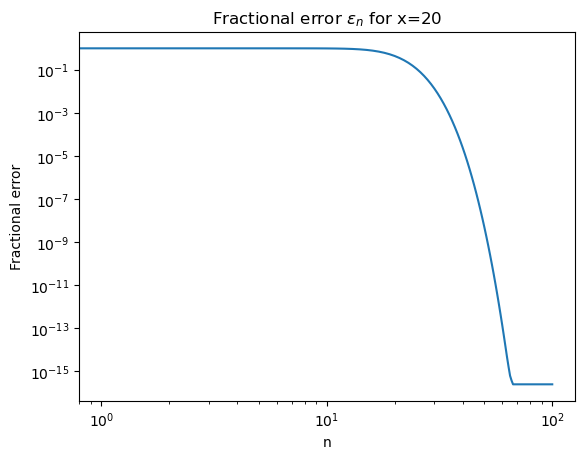

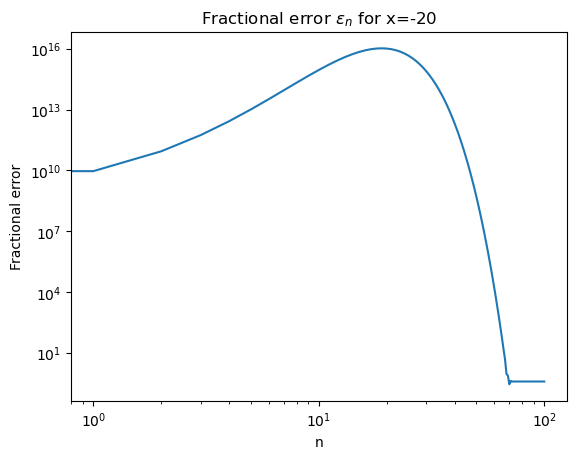

In [100]:
# (2b)
# Plot fractional error over a large range of n
x1 = 20.0
x2 = -20.0

values_1 = []
for i in range(101):
    values_1.append(abs(np.exp(x1)-approx_expon(x1,i)) / np.exp(x1))

plt.xscale("log")
plt.yscale("log")
plt.ylabel("Fractional error")
plt.xlabel("n")
plt.plot(values_1)
plt.title("Fractional error $\epsilon_n$ for x=20")
plt.show()

values_2 = []
for i in range(101):
    values_2.append(abs(np.exp(x2)-approx_expon(x2,i))/np.exp(x2))

plt.xscale("log")
plt.yscale("log")
plt.ylabel("Fractional error")
plt.xlabel("n")
plt.plot(values_2)
plt.title("Fractional error $\epsilon_n$ for x=-20")
plt.show()

We see that the fractional error is high until about $n=30$ for large positive x. For large negative $x$,
the relative error is consistently very high and does not become small, indicating the estimate does not converge to the correct value of $e^{-20}$.

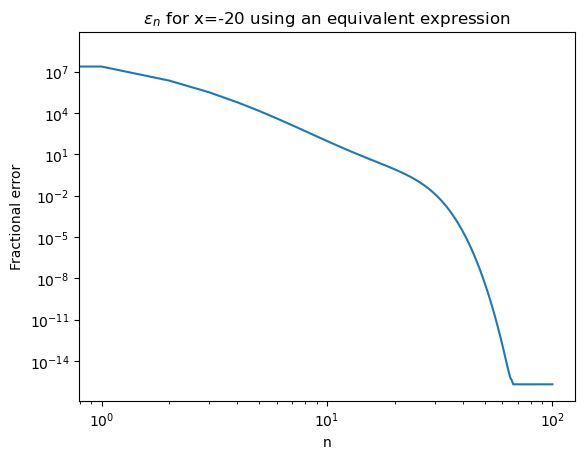

In [101]:
# (2c) Using e^(-x)=1/e^x
x2 = -20.0
values_2 = []
for i in range(101):
    minus_expon = 1.0/approx_expon(-x2,i)  # Using e^-x = 1/e^x
    values_2.append(abs(np.exp(x2)-minus_expon)/np.exp(x2))

plt.xscale("log")
plt.yscale("log")
plt.ylabel("Fractional error")
plt.xlabel("n")
plt.plot(values_2)
plt.title("$\epsilon_n$ for x=-20 using an equivalent expression")
plt.show()

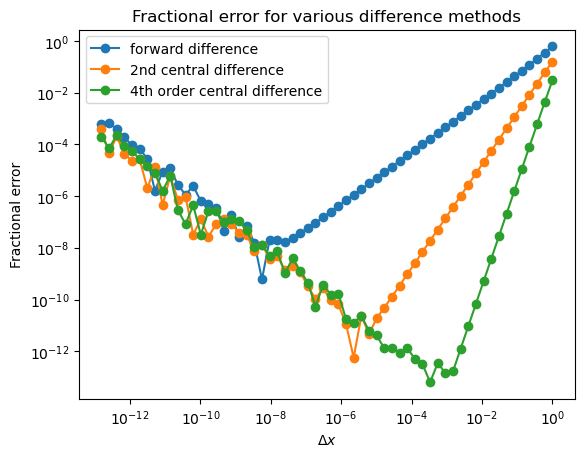

In [102]:
# Question 3 
x = math.pi / 4.0

forward_values = []
central_2nd_order_values = []
central_4th_order_values = []
h_values = []
for i in range(60):
    h = math.exp(-i/2)
    forward_1st_order = (math.sin(x + h) - math.sin(x))/h
    central_2nd_order = (math.sin(x + h) - math.sin(x - h))/(2*h)
    central_4th_order = (math.sin(x-2*h)/12-2*math.sin(x-h)/3+2*math.sin(x+h)/3-math.sin(x+2*h)/12)/h

    forward_values.append(abs(forward_1st_order - math.cos(x))/math.cos(x))
    central_2nd_order_values.append(abs(central_2nd_order - math.cos(x))/math.cos(x))
    central_4th_order_values.append(abs(central_4th_order - math.cos(x))/math.cos(x))

    h_values.append(h)

fig, ax1 = plt.subplots()

ax1.loglog(h_values, forward_values, marker='o', label="forward difference")
ax1.loglog(h_values, central_2nd_order_values, marker='o', label="2nd central difference")
ax1.loglog(h_values, central_4th_order_values, marker='o', label="4th order central difference")

ax1.set_xlabel("$\Delta x$")
ax1.set_ylabel("Fractional error")
ax1.set_title("Fractional error for various difference methods")
ax1.legend()

plt.show()

(3) The first-order forward difference estimate usually has decreasing fractional error proportionate to the decrease of $\Delta x$. However, for $\Delta x \approx 10^{-8}$, any smaller $\Delta x$ leads to a worse estimate. This happens because the roundoff error $\approx \frac{2 C \|f(x)\|}{\Delta x}$ where $C\approx 10^{-16}$ for double precision floats is increasing, hence increasing the total error even if the theoretical truncation error should decrease.

The second and fourth-order central difference estimates have truncation error scaling better with $\Delta x$, allowing for a lower minimum fractional error with fourth-order central difference performing the best. However the three methods still suffer from similar roundoff error.

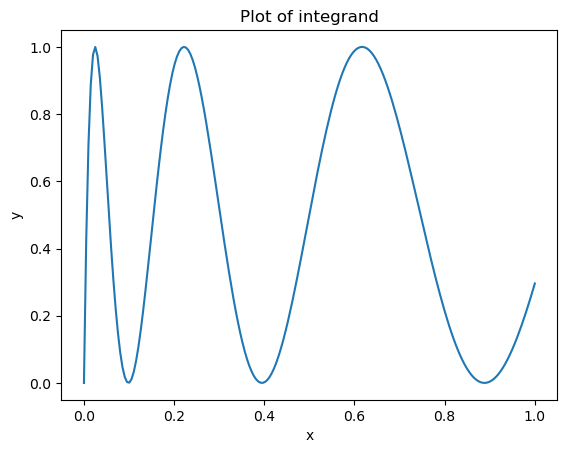

In [103]:
# (4a)
x = np.linspace(0, 1, 200)
y = np.sin(np.sqrt(100*x))**2
plt.plot(x, y)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of integrand")
plt.show()

In [104]:
error = 1.0
iter = 1
old_sum = (integrand(0)+integrand(1))/2

while error > 1e-6:
    n_intervals = 2**iter
    h = 1.0/n_intervals

    new_sum = old_sum/2
    for i in range(1, n_intervals, 2):
        new_sum += h*integrand(i*h)
    error = abs(old_sum-new_sum)/3
    old_sum = new_sum
    iter += 1
    print(new_sum)
print("Sum of",new_sum,"in",n_intervals,"intervals")


0.3252319078064746
0.5122828507233314
0.40299744847824825
0.43010336929474696
0.4484146657874698
0.4539129312153758
0.4553485043728023
0.45571126645324117
0.45580219965166413
0.4558249481324199
0.4558306362016452
0.4558320582782706
Sum of 0.4558320582782706 in 4096 intervals


In [105]:
tolerance = 1e-6
error = tolerance + 1.0

old_sum = (integrand(0)+integrand(1))/2
old_arr = [old_sum] # old_arr stores R's from the previous i
new_arr = [] # new_arr will store R's for fixed i as m increases

i = 2
while error > tolerance:
    n_intervals = 2**(i-1)
    h = 1.0/n_intervals

    new_sum = old_sum/2      # old_sum and new_sum are used to calculate Ri1 via eqn (5)
    for j in range(1, n_intervals, 2):
        new_sum += h*integrand(j*h) 
    R_i_m = new_sum          # initially R21
    new_arr.append(new_sum)
    
    m = 1
    while error > tolerance and m < i:
        R_i_mplus = R_i_m + (R_i_m-old_arr[m-1])/(4**m - 1) # m-1 to account for 0-based indexing
        new_arr.append(R_i_mplus)           # new_arr will contain R21 and R22 for i=2
        print(R_i_mplus,"i:",i,"m:",m+1)

        error = abs(R_i_m-old_arr[m-1])/(4**m - 1) 

        R_i_m = R_i_mplus
        m += 1

    old_sum = new_sum
    old_arr = new_arr
    new_arr = []
    i += 1

print("Sum of",R_i_mplus,"in",n_intervals,"intervals")

0.38431604889308213 i: 2 m: 2
0.5746331650289502 i: 3 m: 2
0.5873209727713414 i: 3 m: 3
0.36656898106322056 i: 4 m: 2
0.35269803546550527 i: 4 m: 3
0.34897386185747614 i: 4 m: 4
0.4391386762335799 i: 5 m: 2
0.44397665591160385 i: 5 m: 3
0.44542552290281173 i: 5 m: 4
0.44580376471083266 i: 5 m: 5
0.4545184312850441 i: 6 m: 2
0.45554374828847505 i: 6 m: 3
0.45572735292937777 i: 6 m: 4
0.4557677522628153 i: 6 m: 5
0.4557774922310968 i: 6 m: 6
0.4557456863580111 i: 7 m: 2
0.4558275033628756 i: 7 m: 3
0.4558320074116756 i: 7 m: 4
0.4558324178214101 i: 7 m: 5
Sum of 0.4558324178214101 in 64 intervals


In [106]:
exact = 0.455832532309085137316 

# 4 points:
w1 = .6521451548625461
w2 = 0.3478548451374538
a1 = -0.3399810435848563
a2 = -0.8611363115940526

appx = w1*gl_integrand(a1) + w1*gl_integrand(-a1) + w2*gl_integrand(a2) + w2*gl_integrand(-a2)
print(abs(exact-appx))

# 6 points:
w1 = 0.3607615730481386
w2 = 0.4679139345726910
w3 = 0.1713244923791704

a1 = 0.6612093864662645
a2 = -0.2386191860831969
a3 = -0.9324695142031521

appx = w1*gl_integrand(a1) + w1*gl_integrand(-a1) + w2*gl_integrand(a2) + w2*gl_integrand(-a2)
+ w3*gl_integrand(a3) + w3*gl_integrand(-a3)

print(exact-appx)

# 7 points 
w1 = 0.3607615730481386
w2 = 0.4679139345726910
w3 = 0.1713244923791704

a1 = 0.6612093864662645
a2 = -0.2386191860831969
a3 = -0.9324695142031521

appx = w1*gl_integrand(a1) + w1*gl_integrand(-a1) + w2*gl_integrand(a2) + w2*gl_integrand(-a2)
+ w3*gl_integrand(a3) + w3*gl_integrand(-a3)

print("7pts error",abs(exact-appx))

# 9 pts

arr = [0.3302393550012598,	0.0000000000000000,
	0.1806481606948574,	-0.8360311073266358,
	0.1806481606948574,	0.8360311073266358,
	0.0812743883615744,	-0.9681602395076261,
	0.0812743883615744,	0.9681602395076261,
	0.3123470770400029,	-0.3242534234038089,
	0.3123470770400029,	0.3242534234038089,
	0.2606106964029354,	-0.6133714327005904,
	0.2606106964029354,	0.6133714327005904]
sum = 0.0
for i in range(0,len(arr),2):
    sum += arr[i]*gl_integrand(arr[i+1])

print("9pts error",sum-exact)

# 8 pts
arr = [
	0.3626837833783620,	-0.1834346424956498,
	0.3626837833783620,	0.1834346424956498,
	0.3137066458778873,	-0.5255324099163290,
	0.3137066458778873,	0.5255324099163290,
	0.2223810344533745,	-0.7966664774136267,
	0.2223810344533745,	0.7966664774136267,
	0.1012285362903763,	-0.9602898564975363,
	0.1012285362903763,	0.9602898564975363]
sum = 0.0
for i in range(0,len(arr),2):
    sum += arr[i]*gl_integrand(arr[i+1])

print("8pts error",sum-exact)

arr = [0.2955242247147529,	-0.1488743389816312,
	0.2955242247147529,	0.1488743389816312,
	0.2692667193099963,	-0.4333953941292472,
	0.2692667193099963,	0.4333953941292472,
	0.2190863625159820,	-0.6794095682990244,
	0.2190863625159820,	0.6794095682990244,
	0.1494513491505806,	-0.8650633666889845,
	0.1494513491505806,	0.8650633666889845,
	0.0666713443086881,	-0.9739065285171717,
	0.0666713443086881,	0.9739065285171717]
sum = 0.0
for i in range(0,len(arr),2):
    sum += arr[i]*gl_integrand(arr[i+1])

print("10pts error",sum-exact)


0.029123227513460637
0.07861627316609193
7pts error 0.07861627316609193
9pts error 1.2313445679756896e-07
8pts error 1.1874110367515733e-05
10pts error 7.563458193082795e-10


(4d) 9 points are needed to make the error < $10^{-6}$

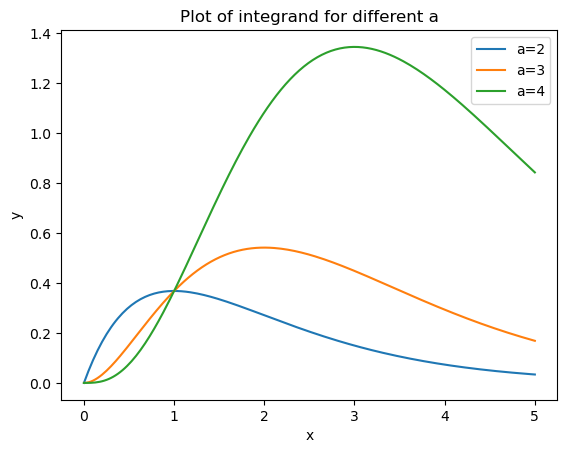

In [107]:
# (5a)
x = np.linspace(0, 5, 200)

for a in range(2, 5):
    y = x**(a-1) * np.exp(-x)
    plt.plot(x, y, label=f"a={a}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of integrand for different a")
plt.legend() 
plt.show()

(b) Setting the derivative to 0 gives $x^{a-2}e^{-x} \left( a-1-x\right)=0$ so $x^* = a-1$.

(c) Solving $\frac{1}{2}=\frac{x^*}{x^*+c}$ for $c$ gives $c=x^*=a-1$.

(d) After some algebra, the integrand is 
\begin{align}
&\left(\frac{zc}{1-z}\right)^{a-1} \exp\left(\frac{-zc}{1-z}\right)\frac{c}{\left(1-z\right)^2}\\
&= \exp\left( (a-1)\ln \left( \frac{-zc}{1-z}\right) \right)  \exp\left(\frac{-zc}{1-z}\right)\frac{c}{\left(1-z\right)^2}
\end{align}
where $x^{a-1}$ was rewritten to reduce roundoff error. (Not using the substitution resulted in nan's for higher a values.)



In [108]:
# (5d) 
# Approximates gamma function using Romberg integration (because it took longest to code)
def gamma_integrand(z, a):
    return math.exp((a-1)*math.log(z*(a-1)/(1-z))-z*(a-1)/(1-z))*(a-1)/(1-z)**2

a_list = [3, 4, 5, 10, 17]
for a in a_list:
    tolerance = 1e-5*2**a        # ensures at most 64 intervals for higher values of a
    error = tolerance + 1.0

    old_sum = (integrand_simplified(1e-15,a)+integrand_simplified(1-1e-15,a))/2 # Needed to prevent division by 0 or taking ln 0
    old_arr = [old_sum] 
    new_arr = [] 

    i = 2
    while error > tolerance:
        n_intervals = 2**(i-1)
        h = 1.0/n_intervals

        new_sum = old_sum/2     
        for j in range(1, n_intervals, 2):
            new_sum += h*integrand_simplified(j*h,a) 
        R_i_m = new_sum        
        new_arr.append(new_sum)
        
        m = 1
        while error > tolerance and m < i:
            R_i_mplus = R_i_m + (R_i_m-old_arr[m-1])/(4**m - 1)
            new_arr.append(R_i_mplus)

            error = abs(R_i_m-old_arr[m-1])/(4**m - 1) 

            R_i_m = R_i_mplus
            m += 1

        old_sum = new_sum
        old_arr = new_arr
        new_arr = []
        i += 1

    print("Sum of",R_i_mplus,"for a =",a,"in",n_intervals,"intervals")

Sum of 1.9977276975647 for a = 3 in 16 intervals
Sum of 6.000005859981091 for a = 4 in 32 intervals
Sum of 23.999987454650004 for a = 5 in 32 intervals
Sum of 362880.00000000367 for a = 10 in 64 intervals
Sum of 20922789888000.727 for a = 17 in 64 intervals
